<a href="https://colab.research.google.com/github/mmartigani/MachineLearning2/blob/main/ML31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from scipy.cluster.hierarchy import dendrogram , linkage
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [7]:
(imagenes_entrenamiento, etiquetas_entrenamiento),(imagenes_prueba, etiquetas_prueba)=mnist.load_data()

In [8]:
imagenes_entrenamiento= imagenes_entrenamiento /255.0
imagenes_prueba = imagenes_prueba / 255.0


In [9]:
etiquetas_entrenamiento[0]

5

In [10]:
etiquetas_entrenamiento= to_categorical(etiquetas_entrenamiento)
etiquetas_prueba= to_categorical(etiquetas_prueba)

In [11]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
modelo = Sequential([Flatten(input_shape=(28,28)),
                     Dense(128, activation='relu'),
                     Dense(10, activation='softmax')])

In [13]:
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [14]:
modelo.fit(imagenes_entrenamiento,
           etiquetas_entrenamiento,
           epochs=5,
           validation_data=(imagenes_prueba, etiquetas_prueba))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2574 - accuracy: 0.9263 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1038 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0.0833 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0787 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0793 - val_accuracy: 0.9748


In [15]:
predicciones= modelo.predict(imagenes_prueba)

313/313 [==============================] - 1s 3ms/step


In [16]:
def ver_imagen(array_predicciones,etiqueta_real, img):
  etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  etiqueta_predicha = np.argmax(array_predicciones)
  if etiqueta_predicha == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"Pred: {etiqueta_predicha} Real: {etiqueta_real}", color=color)

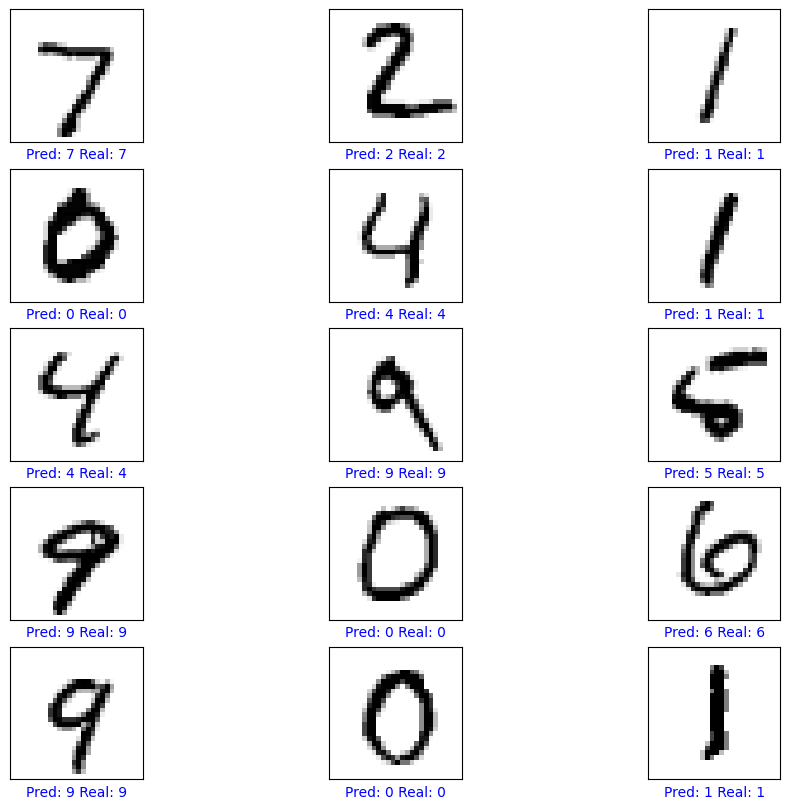

In [18]:
filas = 5
columnas = 3
numero_imagenes = filas  * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(numero_imagenes):
  plt.subplot(filas, 2*columnas,2*i+1)
  ver_imagen(predicciones[i],etiquetas_prueba[i],imagenes_prueba[i])